In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
%load_ext autoreload
%autoreload 2

from wifi import *
from wifi.util import *


import warnings
warnings.filterwarnings("ignore")

DEBUG:matplotlib.pyplot:Loaded backend nbAgg version unknown.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


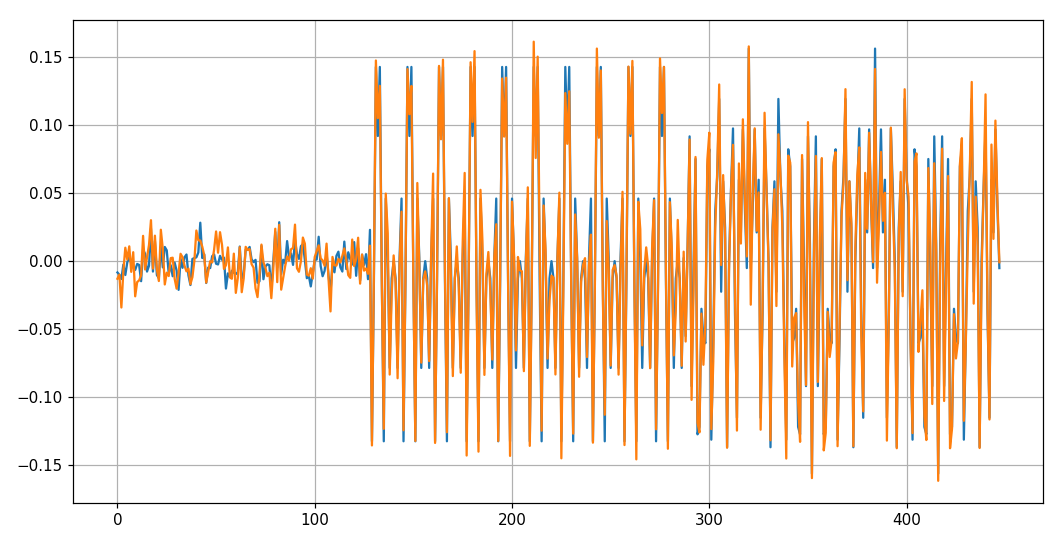

DEBUG:matplotlib.axes._base:update_title_pos


In [10]:
iq = preambler.get()

pad_len = 128
noise = 0.01 *  (np.random.randn(pad_len) + np.random.randn(pad_len)*1j)
iq = np.concatenate([noise, iq])

ch = awgn(iq, 16)

plt.figure(figsize=(9.75,5))
plt.plot(iq)
plt.plot(ch)
plt.tight_layout()
plt.grid()

In [11]:
preambler.detect(ch)

128

In [12]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [13]:
def channel(tx, snr, freq_offset):
    freq_offset = mixer(tx, freq_offset, 20e6)
    rx = awgn(freq_offset, snr)
    return rx

In [14]:
@interact(snr=(-6, 60, 1), freq_offset=100e3, continuous_update=False)
def play(snr, freq_offset):
    rx = channel(iq, snr, freq_offset)
    start_of_long_training = preambler.detect(rx)
    print(start_of_long_training)

interactive(children=(IntSlider(value=27, description='snr', max=60, min=-6), FloatSlider(value=100000.0, desc…

In [15]:
@interact(snr=(-6, 60, 1), freq_offset=0, continuous_update=False)
def play(snr, freq_offset):
    rx = channel(iq, snr, freq_offset)
    start_of_long_training = preambler.detect(rx)
    print(start_of_long_training)

interactive(children=(IntSlider(value=27, description='snr', max=60, min=-6), IntSlider(value=0, description='…

In [62]:
np.linspace(0.4,0.6,100)

array([0.4       , 0.4020202 , 0.4040404 , 0.40606061, 0.40808081,
       0.41010101, 0.41212121, 0.41414141, 0.41616162, 0.41818182,
       0.42020202, 0.42222222, 0.42424242, 0.42626263, 0.42828283,
       0.43030303, 0.43232323, 0.43434343, 0.43636364, 0.43838384,
       0.44040404, 0.44242424, 0.44444444, 0.44646465, 0.44848485,
       0.45050505, 0.45252525, 0.45454545, 0.45656566, 0.45858586,
       0.46060606, 0.46262626, 0.46464646, 0.46666667, 0.46868687,
       0.47070707, 0.47272727, 0.47474747, 0.47676768, 0.47878788,
       0.48080808, 0.48282828, 0.48484848, 0.48686869, 0.48888889,
       0.49090909, 0.49292929, 0.49494949, 0.4969697 , 0.4989899 ,
       0.5010101 , 0.5030303 , 0.50505051, 0.50707071, 0.50909091,
       0.51111111, 0.51313131, 0.51515152, 0.51717172, 0.51919192,
       0.52121212, 0.52323232, 0.52525253, 0.52727273, 0.52929293,
       0.53131313, 0.53333333, 0.53535354, 0.53737374, 0.53939394,
       0.54141414, 0.54343434, 0.54545455, 0.54747475, 0.54949

In [75]:
std = []
snr = 6
freq_offset = 0
for thresh in np.linspace(0.5,0.52,100):
    res = []
    for i in range(1024*8):
        rx = channel(iq, snr, freq_offset)
        start_of_long_training = preambler.detect(rx, thresh)
        res.append(start_of_long_training)
    
    std.append(np.std(res))
    print(thresh, np.mean(res), np.std(res))

0.5 128.12841796875 1.2887028047816627
0.5002020202020202 128.1356201171875 1.2887701396589497
0.5004040404040404 128.133544921875 1.2739838674278416
0.5006060606060606 128.125732421875 1.269116307451546
0.5008080808080808 128.1312255859375 1.291684478078087
0.501010101010101 128.1234130859375 1.230424323112512
0.5012121212121212 128.11669921875 1.2774541498007432
0.5014141414141414 128.1171875 1.2691646105189627
0.5016161616161616 128.087890625 1.2360905182417303
0.5018181818181818 128.11181640625 1.248904606562621
0.502020202020202 128.1131591796875 1.282016798004204
0.5022222222222222 128.1256103515625 1.2426417677745445
0.5024242424242424 128.1319580078125 1.2783099553655428
0.5026262626262626 128.092041015625 1.2937934527264074
0.5028282828282828 128.1077880859375 1.24696032368413
0.503030303030303 128.1199951171875 1.251710002222423
0.5032323232323233 128.134033203125 1.2787146954403286
0.5034343434343435 128.0960693359375 1.271753748472961
0.5036363636363637 128.0572509765625 1.

<IPython.core.display.Javascript object>


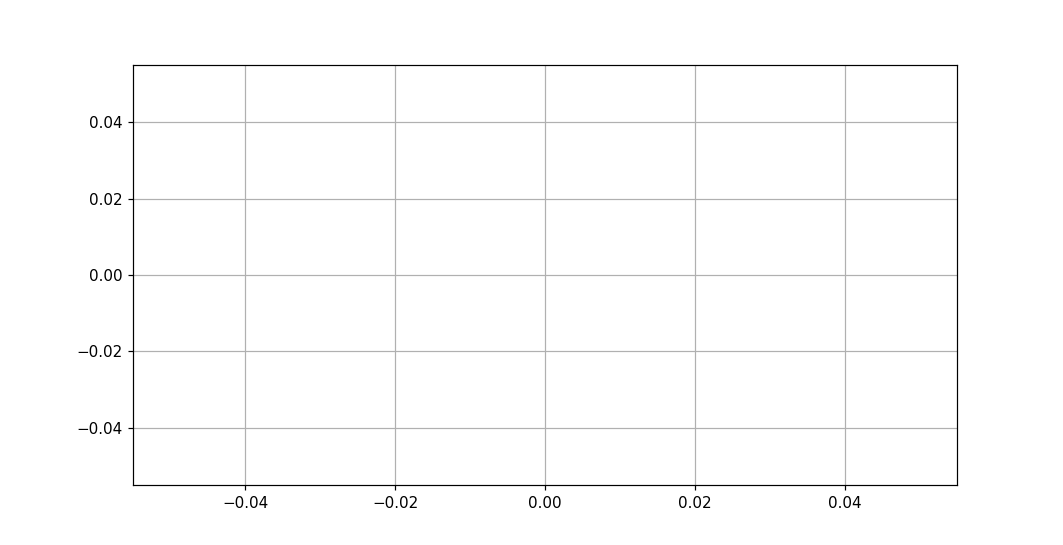

In [78]:
plt.figure(figsize=(9.75,5))
plt.plot(std)
plt.grid()

In [174]:
std = []
snr = 12
freq_offset = -2e3
res = []
for i in range(1024*8):
    rx = channel(iq, snr, freq_offset)
    start_of_long_training = preambler.detect(rx)
    res.append(start_of_long_training)
print(np.std(res))

0.4417060407895658


<IPython.core.display.Javascript object>


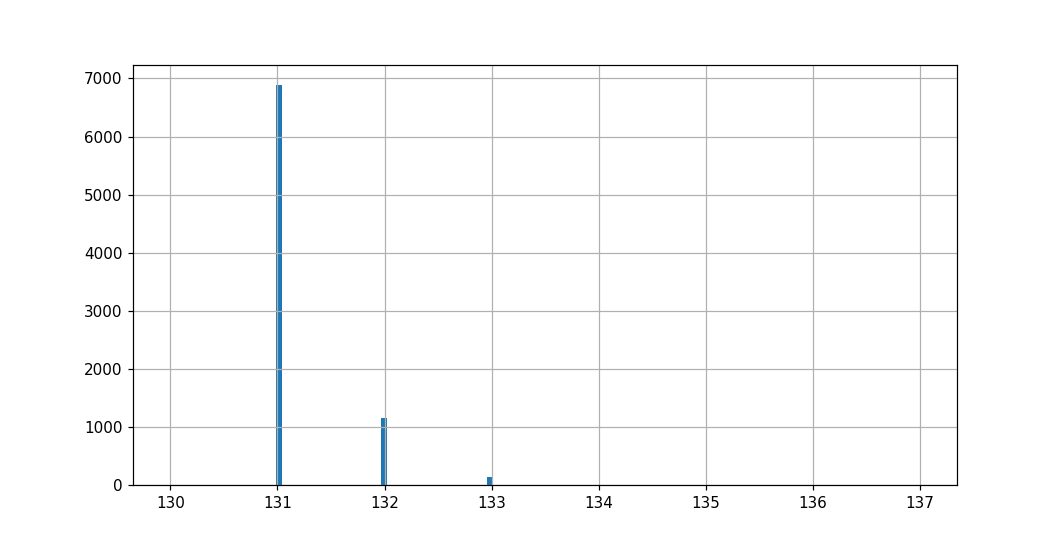

In [175]:
plt.figure(figsize=(9.75,5))
plt.hist(res, 128)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


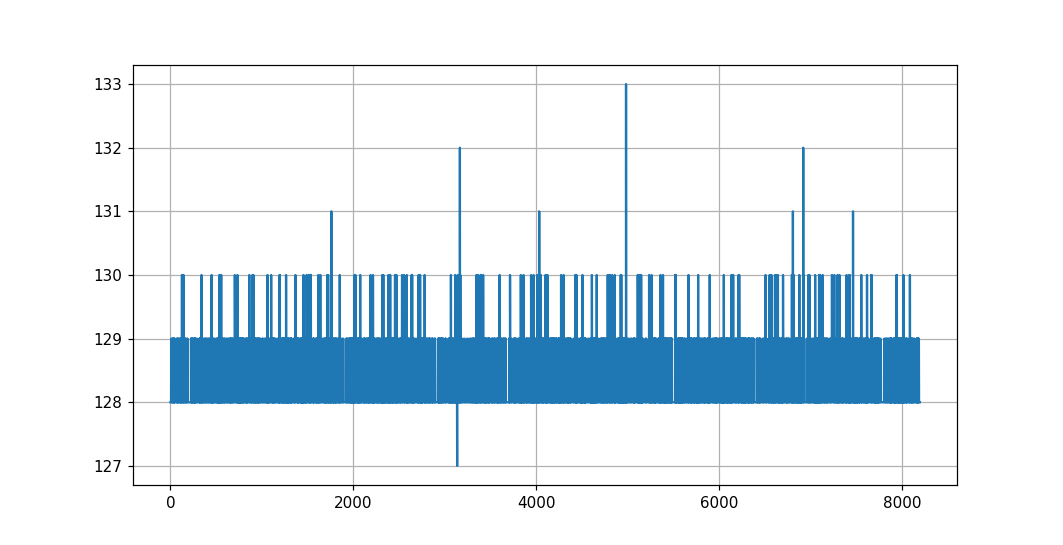

In [169]:
plt.figure(figsize=(9.75,5))
plt.plot(res)
plt.grid()
plt.show()

# ALT timing 

In [ ]:
def timing_acquisition(rx, start_of_long_training, debug=False):
    import scipy
    long_symbol = np.fft.ifft(preambler.long_training_symbol())
    corr = scipy.signal.correlate(rx, long_symbol)
    corr_sign = scipy.signal.correlate(rx, np.sign(long_symbol))
    corr_sign /= corr_sign.max() / corr.max()

    # skip over the first 'halfpeak' - whcih is from guard interval!
    offset = start_of_long_training + 54
    first_peak = np.argmax(corr[offset: offset + 64]) + offset
    offset += 64
    second_peak = np.argmax(corr[offset: offset + 64]) + offset
    print(first_peak)

    print(np.angle(corr[first_peak] * np.conjugate(corr[second_peak])) * (20e6/(2*np.pi*64)))
    print(np.angle(corr_sign[first_peak] * np.conjugate(corr_sign[second_peak])) * (20e6/(2*np.pi*64)))

    if debug:

        plt.figure(figsize=(9.75, 5))
        plt.plot(corr, label='corr')
        plt.plot(corr_sign, label='sign')
        plt.scatter([first_peak], [corr[first_peak]], label='first_peak_pos')
        plt.scatter([second_peak], [corr[second_peak]], label='second_peak_pos')
        plt.xlim([first_peak - 64, first_peak + 128])
        # plt.xlim([0, 500])
        plt.legend()
        plt.tight_layout()
        plt.grid()

        plt.figure(figsize=(9.75, 5))
        plt.plot(long_symbol / long_symbol.max(), label='ideal_long')
        long = rx[first_peak - 64+1:first_peak+1]
        plt.plot(long / long.max(), label='detected_long')
        plt.legend()
        plt.tight_layout()
        plt.grid()


In [ ]:
iq = preambler.get()

pad_len = 128
noise = 0.01 *  (np.random.randn(pad_len) + np.random.randn(pad_len)*1j)
iq = np.concatenate([noise, iq])

ch = channel(iq, 12, 2e3)

plt.figure(figsize=(9.75,5))
plt.plot(iq)
plt.plot(ch)
plt.tight_layout()
plt.grid()

timing_acquisition(ch, 128+160, debug=True)

In [ ]:
timing_acquisition(ch, 128+160, debug=True)